---
# K Means Clustering
---

## Unsupervised Learning Basics


Patterns and structure can be found in unlabeled data using unsupervised learning, an important branch of machine learning. Clustering is the most popular unsupervised learning algorithm; it groups data points into clusters based on their similarity. Because most datasets in the world are unlabeled, unsupervised learning algorithms are very applicable.



## K-means clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

It uses an iterative technique to group unlabeled data into K clusters based on cluster centers (centroids). The data in each cluster are chosen such that their average distance to their respective centroid is minimized.

- 1.Randomly place K centroids for the initial clusters.
- 2.Assign each data point to their nearest centroid.
- 3.Update centroid locations based on the locations of the data points.
- 4.Repeat Steps 2 and 3 until points don’t move between clusters and centroids stabilize.

<img src="k-means-clustering.png" width="600"/>

In [205]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [206]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Viewing and Describing the data

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [208]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [209]:
#Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\wangj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wangj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wangj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

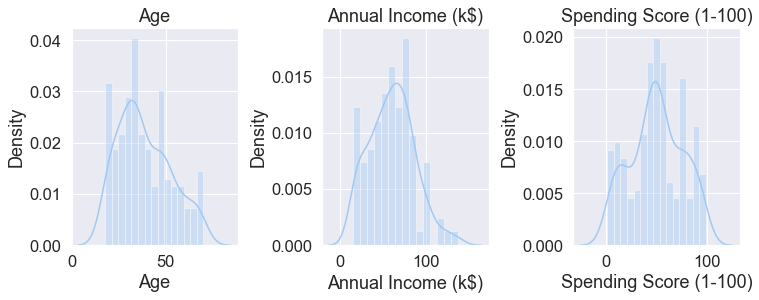

In [210]:
# viewing each parameters distribution

plt.figure(1 , figsize = (12 , 4))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.set_palette("pastel")
    sns.distplot(df[x] , bins = 15)
    plt.title('{}'.format(x))
plt.show()

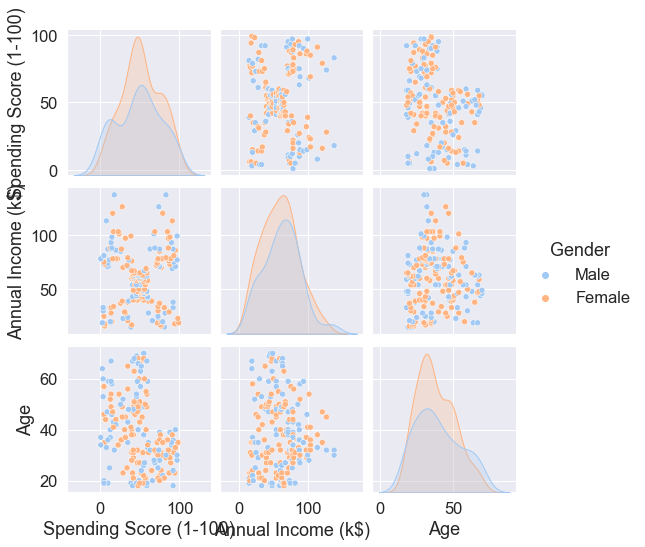

In [211]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

In [212]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

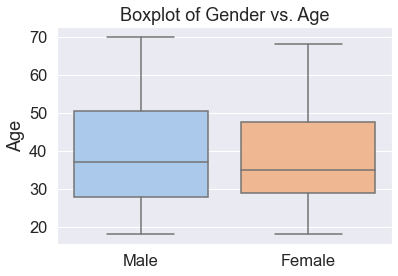

In [213]:
# Plot boxplot of Gender vs Age
sns.boxplot(x = df['Gender'], y = df['Age'])
plt.title("Boxplot of Gender vs. Age")
plt.ylabel("Age")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Male', 'Female'))
plt.show()

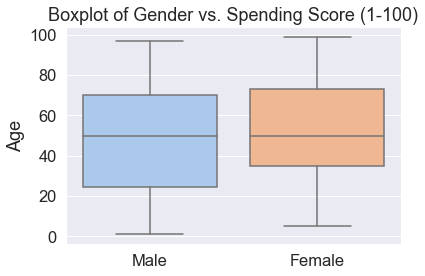

In [214]:
# Plot boxplot of Gender vs Spending Score 
sns.boxplot(x = df['Gender'], y = df['Spending Score (1-100)'])
plt.title("Boxplot of Gender vs. Spending Score (1-100)")
plt.ylabel("Age")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Male', 'Female'))
plt.show()

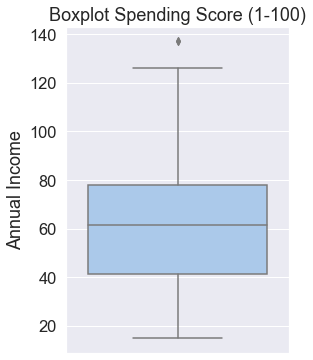

In [215]:
plt.figure(figsize = (4 , 6))
sns.boxplot( y = df['Annual Income (k$)'])
plt.title("Boxplot Spending Score (1-100)")
plt.ylabel("Annual Income")
plt.xlabel(None)

plt.show()

## Clustering bansed on  Age vs Spending Score

In [216]:
from sklearn.cluster import KMeans

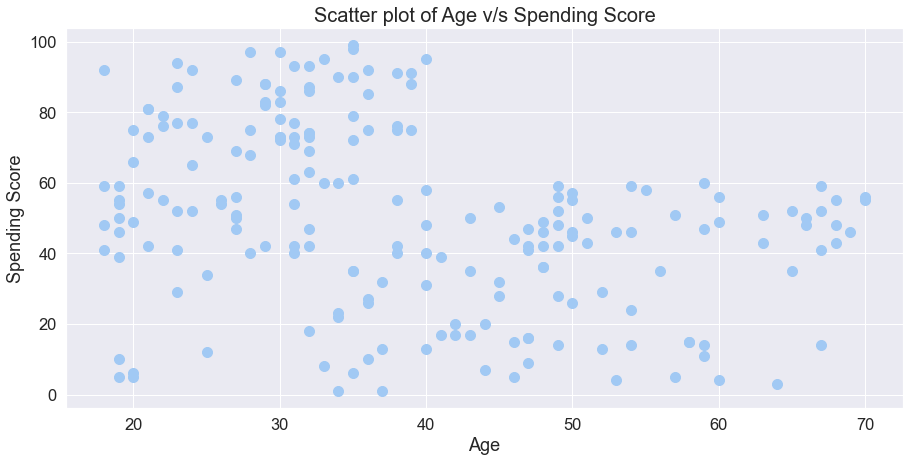

In [217]:
# Create visualisation of data
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

###  Determine the optimal number of clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.
We now demonstrate the given method using the K-Means clustering technique

In [218]:
X1 = df[['Age' , 'Spending Score (1-100)']].to_numpy()
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluster.

wcss=[]
for i in range(1,16):
    km = KMeans(i)
    km.fit(X1)
    wcss.append(km.inertia_)
np.array(wcss)



C:\Users\wangj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([171535.5       ,  75949.15601023,  45840.67661611,  28165.58356663,
        23826.71137396,  19576.01322136,  15523.68401433,  12997.44928812,
        11486.15008779,  10182.17503746,   9398.36743687,   8731.39835656,
         7898.63776324,   7384.57297604,   6897.25539038])

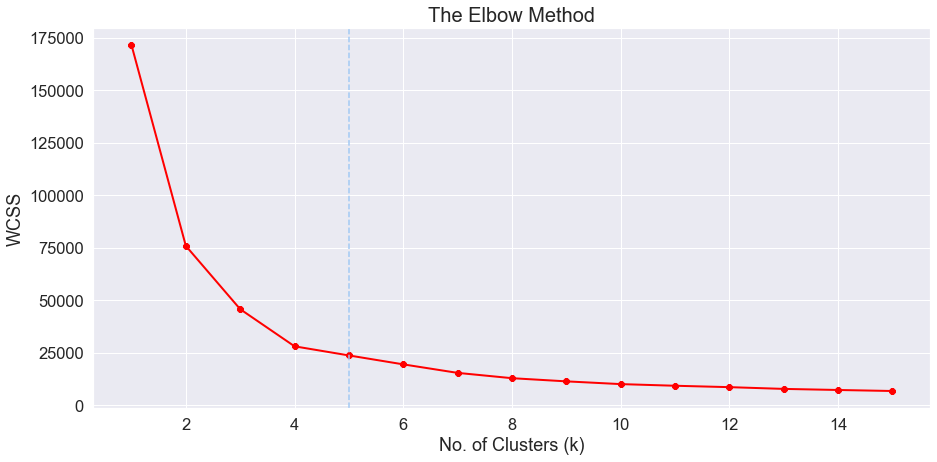

In [219]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,16),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 15. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

### Applying KMeans for k=4

In [220]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 4
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.

algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [221]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

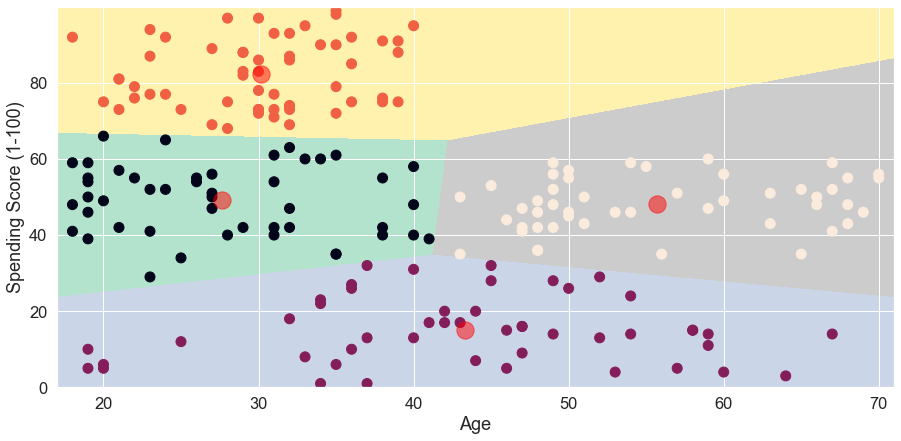

In [222]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Applying KMeans for k=5

In [328]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.


algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [329]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

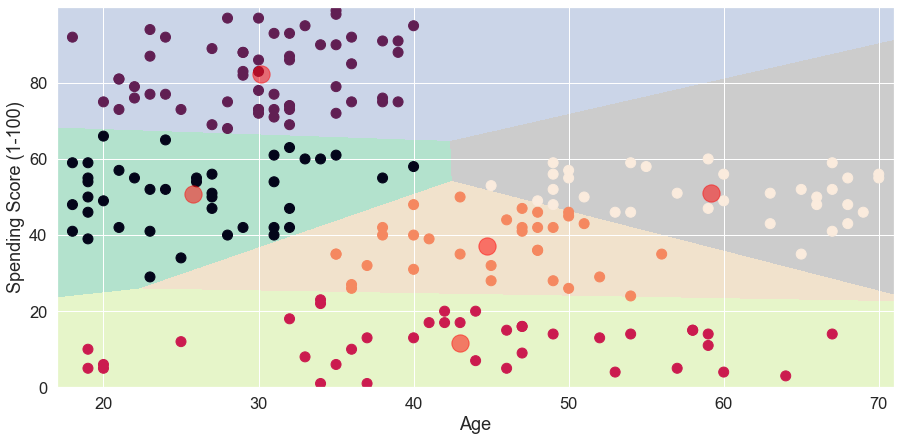

In [330]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

### Test a new customer 

In [334]:
# Suppose there is a new customer with age 32 and spending score 10, and we call him Jackie.
# Let's see which cluster should Jackie belongs to

Jackie = np.array([[32,10]]) 
 
new_customer = algorithm.predict(Jackie)
print(f"Jackie belongs to segment {new_customer}")

Jackie belongs to segment [2]


## Clustering bansed on  Age vs Annual Income (k$)

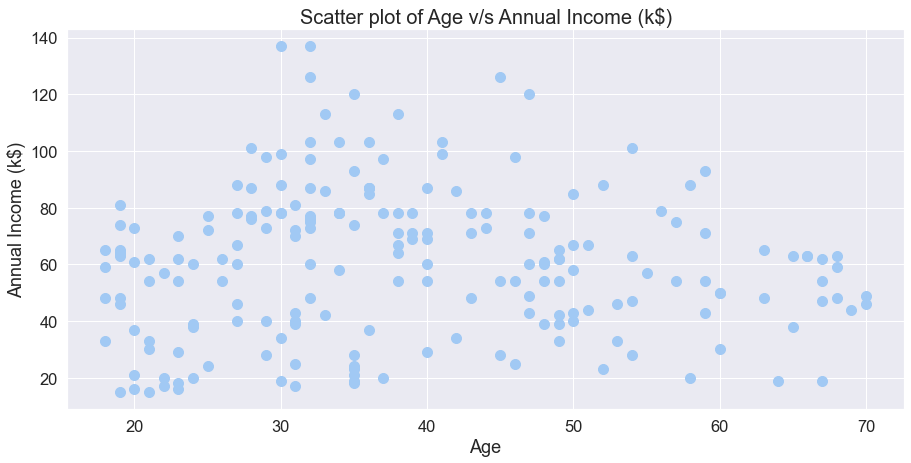

In [226]:
# Create visualisation of data
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Annual Income (k$)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.scatter( x = 'Age', y = 'Annual Income (k$)', data = df, s = 100)
plt.show()

###  Determine the optimal number of clusters

In [293]:
X2 = df[['Age' , 'Annual Income (k$)']].to_numpy()
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluster.

wcss=[]
for i in range(1,16):
    km = KMeans(i)
    km.fit(X2)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\wangj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([176108.78      ,  87121.56591479,  59492.73799493,  39502.77850065,
        31651.38088524,  25399.02200442,  22401.92215384,  18842.04933386,
        16234.54935916,  13701.34929395,  12145.22883228,  11195.42282693,
        10079.72250508,   9054.66596218,   8164.26356115])

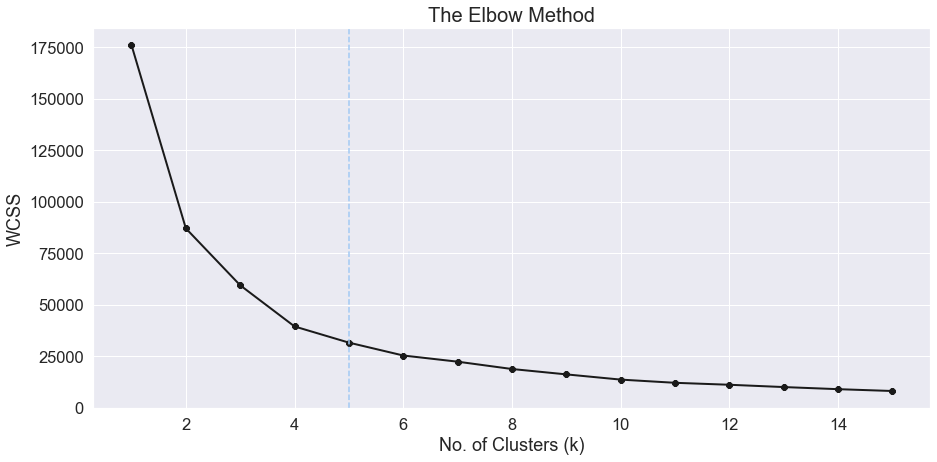

In [294]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,16),wcss, linewidth=2, color="k", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [300]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.


algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [301]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

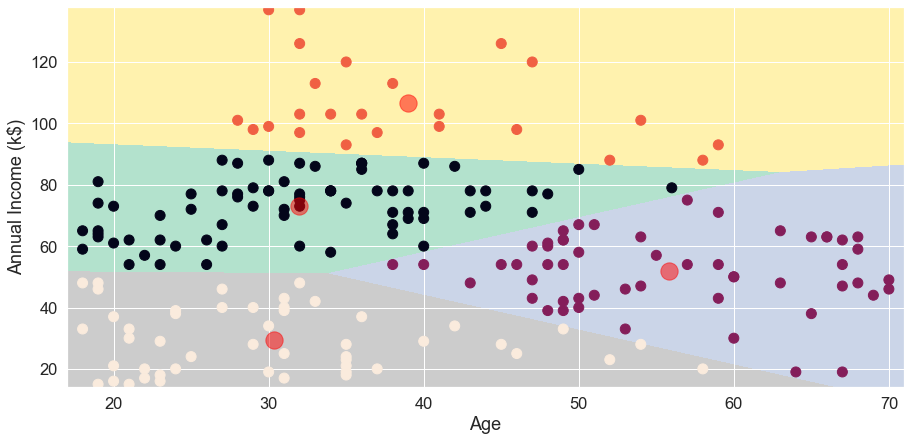

In [302]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Annual Income (k$)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Annual Income (k$)') , plt.xlabel('Age')
plt.show()

## Clustering bansed on  Annual Income (k$) vs Spending Score

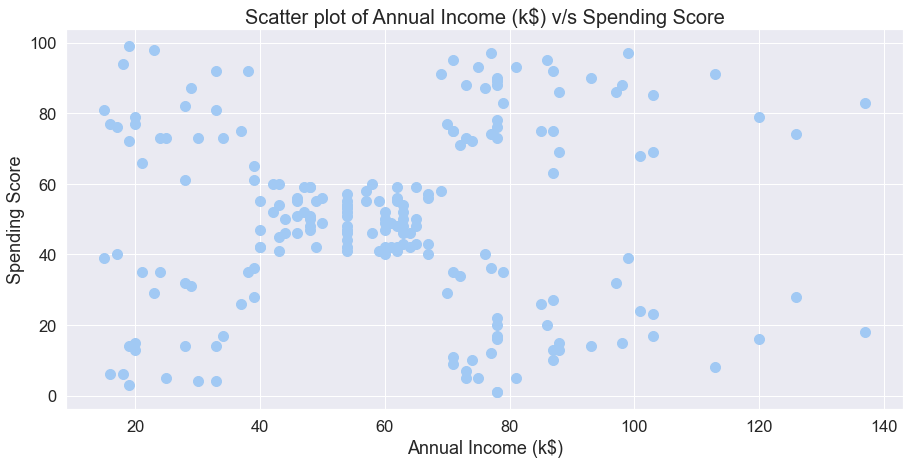

In [232]:
# Create visualisation of data
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Annual Income (k$) v/s Spending Score', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 100)
plt.show()

In [268]:
X3 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
#X3 = df[[ 'Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluster.

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

C:\Users\wangj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "
C:\Users\wangj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


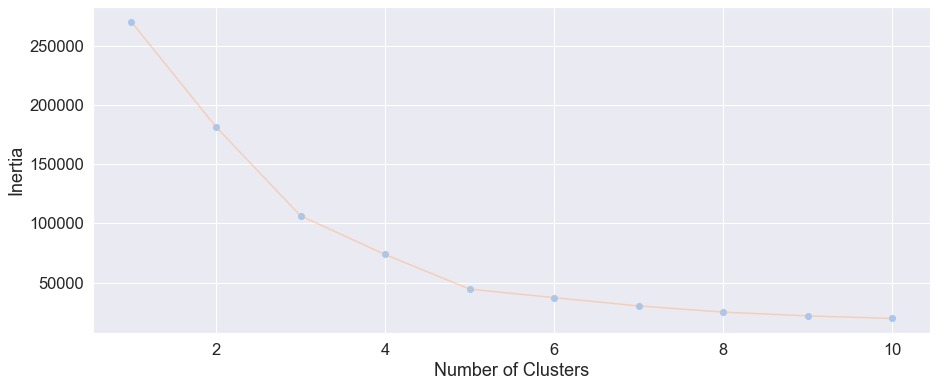

In [270]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [320]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.


algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [327]:
centroids1

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [322]:
h = 0.01
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

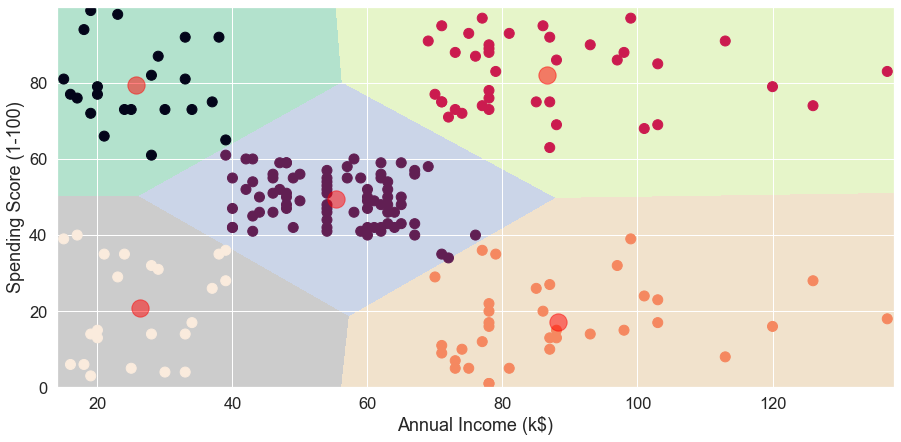

In [323]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()